## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [2]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [46]:
def resize(img):
    near_img = misc.imresize(img, 0.5, interp = 'nearest')
    bilinear_img = misc.imresize(img, 0.5, interp = 'bilinear')
    bicubic_img = misc.imresize(img, 0.5, interp = 'bicubic')
    return near_img, bilinear_img, bicubic_img

Text(0.5,0.98,'Resize with bicubic function')

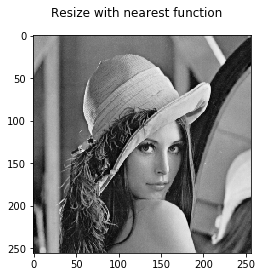

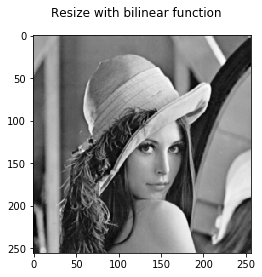

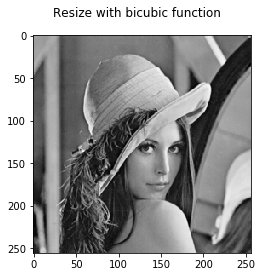

In [47]:
img_path = './images/'
img_name = 'lena-grey.bmp'
img_lena = io.imread(img_path.__add__(img_name))
img_lena_float = img_as_float(img_lena)
near_img, bilinear_img, bicubic_img = resize(img_lena_float)
plt.imshow(near_img, cmap = plt.cm.gray)
plt.suptitle('Resize with nearest function')
plt.figure()
plt.imshow(bilinear_img, cmap = plt.cm.gray)
plt.suptitle('Resize with bilinear function')
plt.figure()
plt.imshow(bicubic_img, cmap = plt.cm.gray)
plt.suptitle('Resize with bicubic function')

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [56]:
def blending(img1, img2, method):
    n1, m1 = img1.shape
    n2 ,m2 = img2.shape
    if method == 'simple blendind':
        I1 = (np.ones((np.ceil(n1/2),m1)), np.zeros((np.ceil(n1/2),m1)))
        img_array1 = misc.imread(img1)
        img_blend = img1*I1
        img_blend = Image.fromarray(img_blend, 'RGB')
    return img_blend

In [64]:
#i = blending(img_lena_float,img_lena_float, 'simple blending')
n1 ,m1 = img_lena_float.shape
I1 = (np.ones((n1//2,m1)), np.zeros((n1//2,m1)))
img_array1 = matplotlib.misc.imread(img_lena_float)
img_blend = img1*I1
img_blend = Image.fromarray(img_blend, 'RGB')
plt.imshow(img_blend)

NameError: name 'matplotlib' is not defined